In [ ]:
%pip install -q pandas==2.1.0
%pip install -q seaborn==0.13.1
%pip install -q scikit-learn==1.3.2

In [ ]:
!git clone https://github.com/demianw/Xed.git
%cd Xed/ames_datasets

# Exploring Realstate Sales Prices

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Exploration

### Question 1

Load the titanic using `pandas`. It is located in `datasets/ames_housing.csv`. Using the function `head()` and `info()`, which issues do you identify which need to be noted before to learn a machine learning model.

The dataset is described in https://www.kaggle.com/datasets/prevek18/ames-housing-dataset

In [6]:
data = pd.read_csv('../datasets/ames_housing.csv')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Question 2

- Identify the target variable: "SalePrice", what's its type? What are its distributionals characteristics?
- What variables contain more missing values?

## Question 3
Split the data into features and target variables.
Then, the data into a model selection, sample and a model evaluation sample. Use `sklearn.model_selection.train_test_split`.
Use a 20% ratio.

In [7]:
from sklearn.model_selection import train_test_split
target = data["SalePrice"]
features = data.drop(columns="SalePrice")

selection_features, evaluation_features, selection_target, evaluation_target = train_test_split(
    features, target, test_size=.2
)
selection_target.shape

(2344,)

## Question 4
Extract the columns with numerical data using `selection_features.select_dtypes("number")`. Examine their distributions, through histograms. What issues do you identify? 

# Section 2: Implement a linear regressor using only the numerical variables

### Question 1
Use a Column Transformer to _just select_ the numerical variables. Build a dimensionality reduction pipeline using `sklearn.decomposition.PCA` 

For this we will
* build the column transformer
* build the machine learning pipeline

How many components do you need to express 90% of the variance of the data? Why?

* Use if your pipeline is called `pipeline` use `pipeline[-1][1].explained_variance_ratio_` to figure out how much variance explains each component of PCA

In [26]:
from sklearn.decomposition import PCA
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

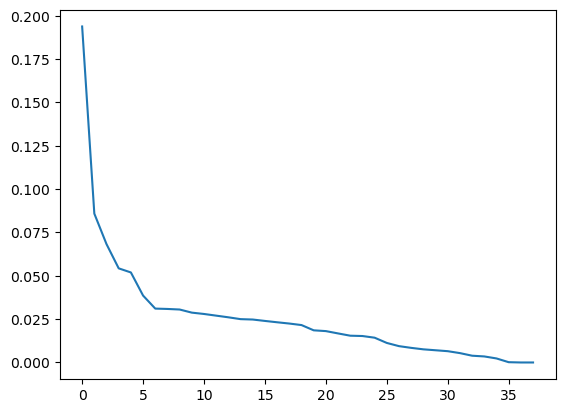

In [25]:
pipeline = make_pipeline(
    make_column_transformer((make_pipeline(SimpleImputer(), StandardScaler()), selection_features.select_dtypes("number").columns)),
    PCA()
)
pipeline.fit(selection_features)
plt.plot(pipeline.steps[-1][1].explained_variance_ratio_)

### Question 2
Repeat the same excercise but using KernelPCA, a non-linear version of PCA. 


In [27]:
from sklearn.decomposition import KernelPCA


### Question 5
Use the PCA and KernelPCA dimensionality reduction to implement a regression syste for the house prices. How many components you need to have an error in the estimation of the price of less than 15%? How much data do you need to train these models?